In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('C:/Users/snehi/OneDrive/Desktop/train.csv/train.csv')

In [9]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data = np.array(data)

In [11]:
data.shape

(42000, 785)

In [12]:
data = np.array(data)

In [13]:
data

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
data.shape

(42000, 785)

In [15]:
data.dtype

dtype('int64')

In [16]:
m,n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev/255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train/255

In [17]:
Y_train

array([1, 1, 0, ..., 7, 0, 5], dtype=int64)

In [18]:
data_train.shape

(785, 41000)

In [19]:
def init_params():
    w1 = np.random.rand(10,784)-0.5 
    b1 = np.random.rand(10,1) - 0.5 
    w2 = np.random.rand(10,10) - 0.5 
    b2 = np.random.rand(10,1) - 0.5 
    return w1,b1,w2,b2

In [20]:
def ReLU(Z):
    return np.maximum(0,Z)
    
def softmax(Z):
    return np.exp(Z)/sum(np.exp(Z))

def forward_prop(w1,b1,w2,b2,X):
    z1 = w1.dot(X)+b1
    a1 = ReLU(z1)
    z2 = w2.dot(a1) +b2
    a2 = softmax(z2)
    return z1,a1,z2,a2
    
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() +1))
    one_hot_Y[np.arange(Y.size),Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def derivative_ReLU(Z):
    return Z>0
    
def back_prop(z1,a1,z2,a2,w1,w2,X,Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dz2= a2- one_hot_Y
    dw2= 1/m * dz2.dot(a1.T)
    db2 = 1/m * np.sum(dz2)
    dz1 = w2.T.dot(dz2)
    dw1 = 1/m * dz1.dot(X.T)
    db1 = 1/m * np.sum(dz1)
    return dw1,db1,dw2,db2

def update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha):
    w1 = w1-alpha*dw1
    b1 = b1-alpha*db1
    w2 = w2-alpha*dw2
    b2 = b2-alpha*db2
    return w1,b1,w2,b2
    

In [21]:
def get_predictions(a2):
    return np.argmax(a2,0)

def get_accuracy(predictions,Y):
    print(predictions,Y)
    return np.sum(predictions==Y)/Y.size




def gradient_descent(X,Y,iterations,alpha):
    w1,b1,w2,b2 = init_params()
    for i in range(iterations):
        z1,a1,z2,a2 = forward_prop(w1,b1,w2,b2,X)
        dw1,db1,dw2,db2 = back_prop(z1,a1,z2,a2,w1,w2,X,Y)
        w1,b1,w2,b2 = update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha)
        if i%10==0:
            print('iteration: ',i)
            print('accuracy: ',get_accuracy(get_predictions(a2),Y))
    return w1,b1,w2,b2





In [22]:
w1,b1,w2,b2 = gradient_descent(X_train,Y_train,500,0.1)

iteration:  0
[8 8 9 ... 9 8 8] [1 1 0 ... 7 0 5]
accuracy:  0.10746341463414634
iteration:  10
[8 7 0 ... 9 2 9] [1 1 0 ... 7 0 5]
accuracy:  0.3034390243902439
iteration:  20
[8 1 0 ... 9 2 9] [1 1 0 ... 7 0 5]
accuracy:  0.4645365853658537
iteration:  30
[1 1 0 ... 9 2 9] [1 1 0 ... 7 0 5]
accuracy:  0.5648048780487804
iteration:  40
[1 1 0 ... 9 0 9] [1 1 0 ... 7 0 5]
accuracy:  0.6175609756097561
iteration:  50
[1 1 0 ... 9 0 9] [1 1 0 ... 7 0 5]
accuracy:  0.6528780487804878
iteration:  60
[1 1 0 ... 7 0 9] [1 1 0 ... 7 0 5]
accuracy:  0.6774878048780488
iteration:  70
[1 1 0 ... 7 0 9] [1 1 0 ... 7 0 5]
accuracy:  0.695
iteration:  80
[1 1 0 ... 7 0 9] [1 1 0 ... 7 0 5]
accuracy:  0.7086097560975609
iteration:  90
[1 1 0 ... 7 0 9] [1 1 0 ... 7 0 5]
accuracy:  0.7184878048780488
iteration:  100
[1 1 0 ... 7 0 9] [1 1 0 ... 7 0 5]
accuracy:  0.7288292682926829
iteration:  110
[1 1 0 ... 7 0 9] [1 1 0 ... 7 0 5]
accuracy:  0.7368780487804878
iteration:  120
[1 1 0 ... 7 0 9] [1 1 

In [23]:
def make_predictions(X,w1,b1,w2,b2):
    _, _, _, a2 = forward_prop(w1, b1, w2, b2, X)
    predictions = get_predictions(a2)
    return predictions

def test_prediction(index, w1, b1, w2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], w1, b1, w2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
    

Prediction:  [1]
Label:  1


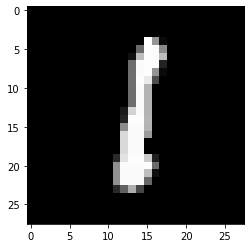

In [24]:
test_prediction(0,w1,b1,w2,b2)

In [25]:
dev_predictions = make_predictions(X_dev, w1, b1, w2, b2)
get_accuracy(dev_predictions, Y_dev)

[9 2 1 1 6 3 5 4 6 0 3 9 3 6 9 6 6 5 5 0 1 7 3 0 4 7 4 8 2 4 3 0 7 7 1 9 4
 5 1 3 2 1 2 7 3 3 6 1 4 6 7 3 7 6 1 4 5 4 1 6 9 2 7 1 1 6 5 6 0 3 2 5 0 6
 1 0 4 2 4 6 4 4 1 1 0 9 7 5 6 6 0 7 3 6 4 8 8 1 7 9 1 3 8 0 9 1 3 7 7 1 8
 1 4 7 3 7 5 8 5 8 7 6 6 8 0 9 3 2 2 1 2 5 9 0 2 9 5 3 6 0 1 7 5 7 9 4 0 8
 0 8 7 0 2 6 2 7 2 5 8 0 4 7 0 1 8 6 0 1 7 3 4 8 1 4 8 0 3 1 3 6 0 7 2 4 1
 9 6 6 5 3 6 8 8 3 2 7 3 7 3 0 1 3 7 2 9 0 9 1 2 0 0 9 7 1 8 9 7 1 4 3 9 6
 1 4 3 5 9 1 6 1 9 8 0 3 2 6 7 6 2 8 6 3 6 8 0 8 2 6 1 1 0 2 5 2 5 8 8 5 1
 4 9 8 5 0 3 0 5 0 2 9 6 9 9 1 1 9 0 8 0 3 1 0 7 3 2 2 8 9 2 9 0 1 9 6 6 1
 4 3 3 0 9 6 9 5 6 9 6 1 1 6 6 4 8 8 2 0 6 1 9 7 1 3 8 1 9 7 3 0 7 1 4 5 8
 0 7 2 0 8 4 3 1 9 4 1 3 7 2 9 7 6 4 1 0 9 5 1 2 1 8 2 1 7 1 0 5 9 9 9 6 1
 7 4 9 1 1 4 2 5 9 6 4 1 4 7 9 2 7 1 7 8 3 0 9 1 3 9 7 8 0 4 7 4 3 6 5 9 1
 1 7 0 6 3 7 6 2 1 3 2 2 3 1 6 2 4 9 6 5 2 0 9 7 6 1 8 5 0 6 3 4 6 5 1 2 6
 0 0 0 7 9 4 9 2 4 2 2 1 1 3 8 5 9 7 6 1 1 3 9 6 0 0 7 4 2 2 7 9 5 4 5 2 9
 8 7 3 4 1 7 6 9 1 6 5 3 

0.839